(PPExample)=
# Example: Post-processed data plots

This file shows how the PostProcessData results would ideally look like

## Imports
Importing the packages to plot the processed data

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# print(plt.style.available)
plt.style.use('seaborn-v0_8-pastel')
def plot_collected(PPData):
    for _,chart_df in PPData.All_chart_info.group_by(["Chart"]):
        # print(chart_df, chart_df.select("Label")[0].item(), PPData.df_processed.columns)
        if not chart_df.select("Label")[0].item() in PPData.df_processed.columns:
            continue
        _,axes = plt.subplots(chart_df.select("Layout")[0].item())
        if not isinstance(axes,np.ndarray): # If it is only a single axis
            axes = [axes]
        chart_nos = int(chart_df["Layout"][0]) - 1
        colors = plt.get_cmap("Paired",10)
        colors = [i for i in colors.colors]
        colors = iter(colors)
        for row in chart_df.iter_rows(named=True):
            plot_pos = int(row["Position"])-1
            axes[plot_pos].plot(PPData.df_processed.select("Time"),PPData.df_processed.select(row["Label"]),label=row["Legend"], c= next(colors))
            axes[row["Position"]-1].set_xlabel("Time (s)")
            axes[plot_pos].set_ylabel(row["Chart"]+" ( "+row["Processed_Unit"]+" )")
            if not plot_pos == chart_nos:
                axes[plot_pos].get_xaxis().set_visible(False)
            if plot_pos == 0:
                axes[plot_pos].set_title(chart_df["Chart"][0] + " graph")
            axes[plot_pos].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    return

## Collecting and post processing data  
Based on the data, config file, and a formulae file in `tests`.

**Note: The plots generated below are only for example. These are not the final plots one should rely on. This is especially true when you need to correct the collected data by constructing a baseline to consider drifting of some sensors (example oxygen sensor).**

See {doc}`DAQUtils documentation<autoapi/firepydaq/utilities/DAQUtils/index>` to learn more about how to add custom map for a variable and a desired function to process the data using {doc}`PostProcessData<autoapi/firepydaq/utilities/PostProcessing/index>`.

['DuctTC1', 'DuctTC2', 'DuctTC3']
['Tmean']
[]
['pi', 'ID']
['KRosemont', 'sqrt', 'dPDuctAvg', 'rho_e']
['vel_e', 'A_duct', 'rho_e']
['KDwyer', 'sqrt', 'dPDuctDwyer', 'rho_e']
['vel_dwyer', 'A_duct', 'rho_e']
['vel_e', 'A_duct']
['vel_dwyer', 'A_duct']
['mean', 'DuctO2', 'min', 'len', 'DuctO2']
['mean', 'DuctCO2', 'min', 'len', 'DuctCO2']
['mean', 'DuctCO', 'min', 'len', 'DuctCO']
['abs', 'O2Base', 'DuctO2', 'DuctO2']
['E', 'C_factor', 'm_e', 'O2Depletion']
['O2Base', 'DuctCO2', 'DuctCO', 'DuctO2', 'CO2Base', 'O2Base', 'DuctCO2', 'DuctCO', 'DuctO2']
['abs', 'O2Base', 'O2DepletionCOCO2', 'O2DepletionCOCO2', 'DuctCO2', 'DuctO2', 'O2Base', 'O2DepletionCOCO2']
['E', 'C_factor', 'm_e', 'O2Mult']


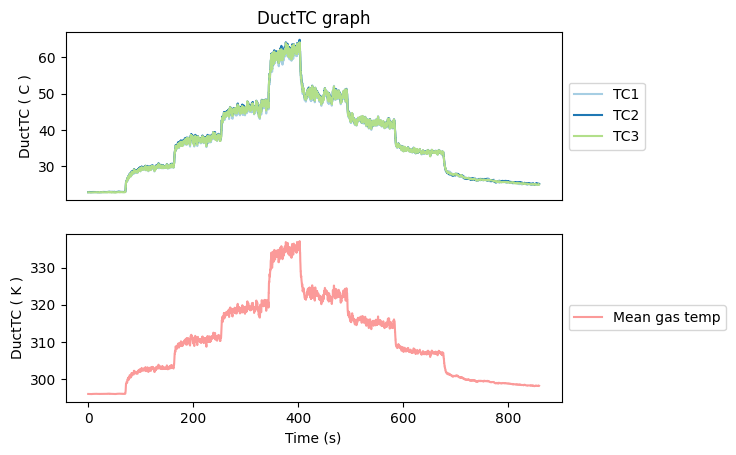

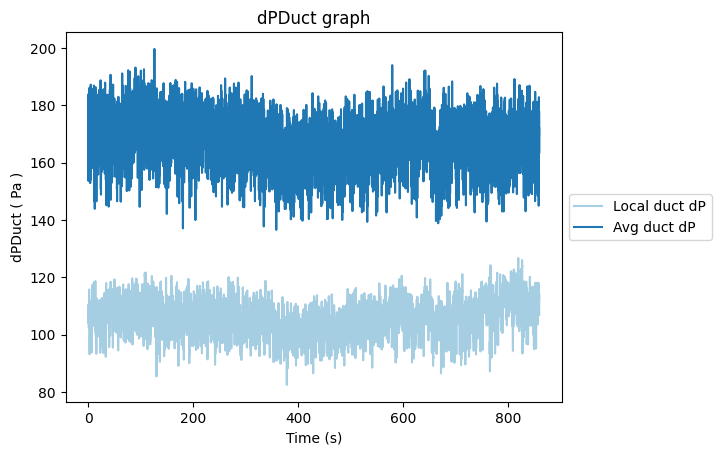

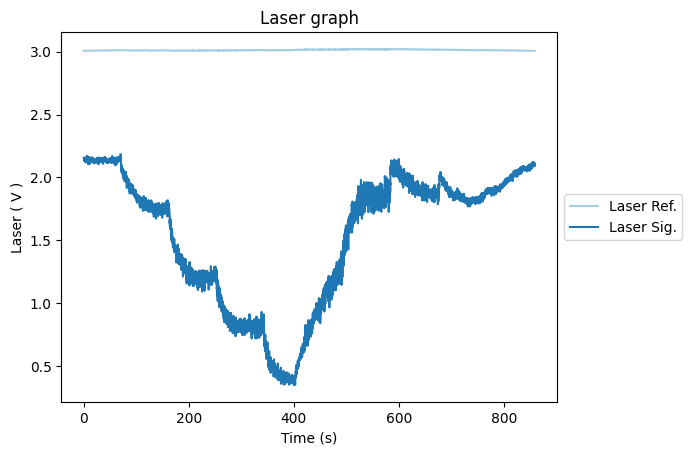

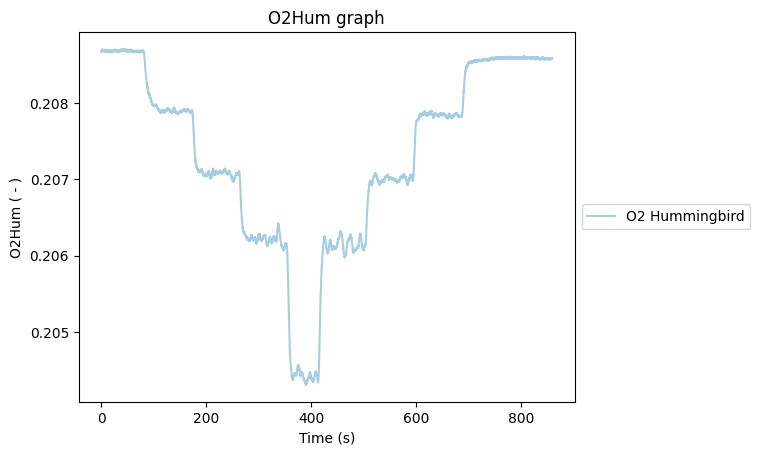

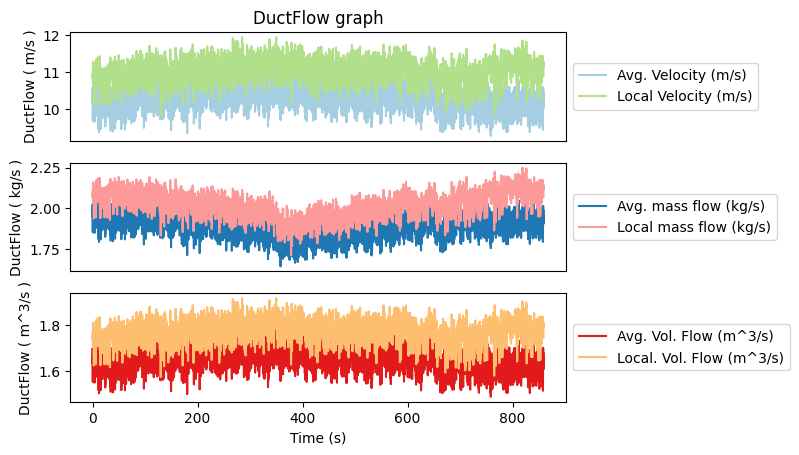

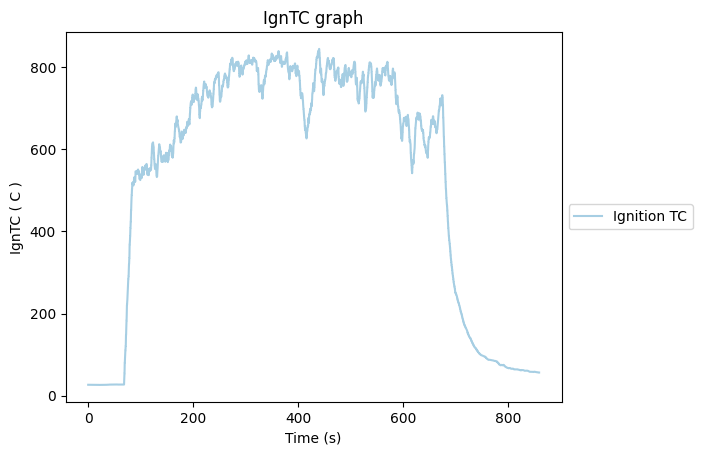

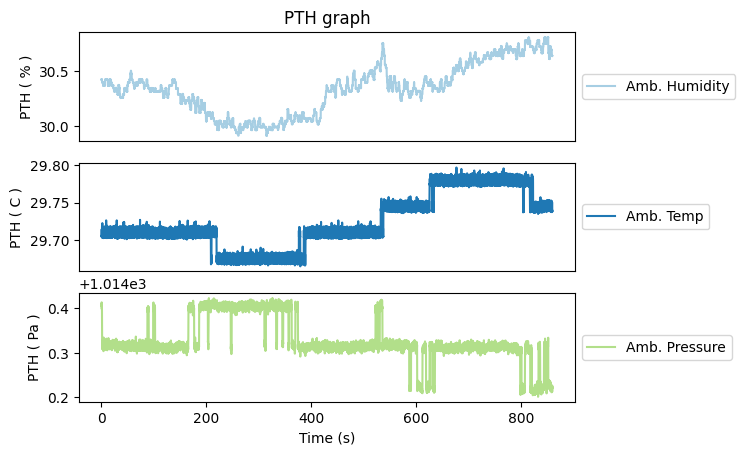

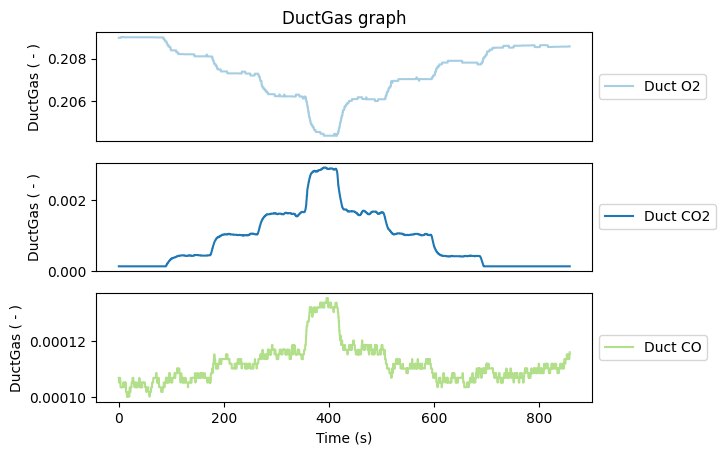

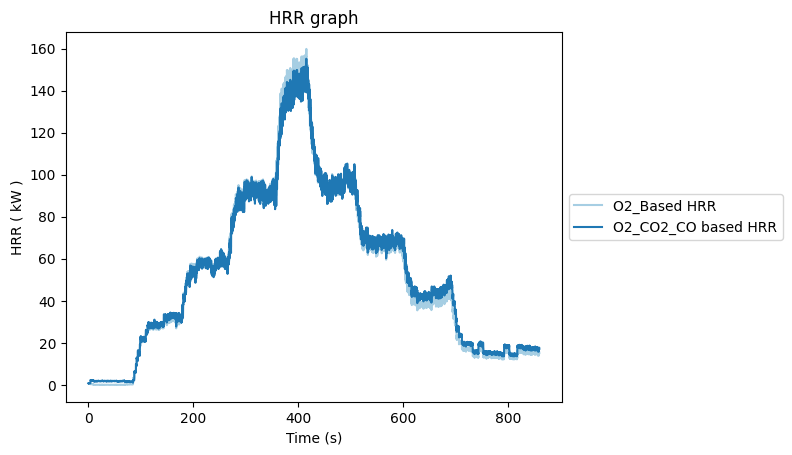

In [4]:
from firepydaq.utilities.PostProcessing import PostProcessData

datapath = '../tests/Example_ExpData/20240612_1717_ExampleFireData_Testing_Dushyant.parquet'
formulaepath = '../tests/Example_Config_Formulae/Processing_formulae.csv'
configpath = '../tests/Example_Config_Formulae/20240329_1354_CalorimetryWLaser_Dushyant.csv'

PPData = PostProcessData(datapath = datapath, configpath = configpath, formulaepath = formulaepath)
PPData.ScaleData()
PPData.UpdateData(dump_output = False)
plot_collected(PPData)
